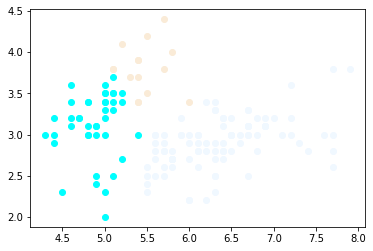

In [25]:
"""
Custom Implementation of Kmeans
By Livi Poon

Course Notes:

Kmeans works like this:

>Randomly pick a centroid location for each of the K clusters. Oftentimes, they are initialized to just K random datapoints. However, by weighting the random selection a bit using a technique called K-means++ (an option built into sci-kit learn), you can get much better performance.
>Repeat the following until the centroids are moving less than the threshold distance:
    >cluster assignment - assign each datapoint to the cluster whose centroid is closest.
    >move the centroids - move centroids to the mean (or, if you want, median) of their clusters.
"""
import numpy
import math as m
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import random
from sklearn import datasets
from sklearn import preprocessing
from sklearn import metrics
import pandas
import sys

coordsX = [] #create lists
coordsY = []
coords = []
historyCoords = []
finalcentroids = []

clusters = [] #throwaway lists
centroids = []
iteration = 0

colors = list(mcolors.CSS4_COLORS) #load colors

iris = datasets.load_iris() #load dataframe
iris_df = pandas.DataFrame(iris.data) #create a pandas dataframe
iris_df.columns = iris.feature_names #add a column that defines names

for i in range(len(iris.data)): #extracting data from the pandas dataframe
    coordsX.append(iris.data[i][0]) #assigning different values to their respected lists
    coordsY.append(iris.data[i][1])
    coords.append([iris.data[i][0],iris.data[i][1],0]) #create an array of x and y coordinates
    
def kmeans(k):
    global clusters
    global centroids
    
    for i in range(k): #grabbing centroids from preexisting data points
        h = random.randrange(len(coords))
        centroids.append(coords[h]) #appending them to a list
        coords.remove(coords[h]) #removing them from the points list.
        coordsX.remove(coords[h][0])
        coordsY.remove(coords[h][1])

    kmeansIterator(k) #run iteration
    
def kmeansIterator(k): 
    global clusters #globalize lists
    global iteration
    global centroids
    global finalcentroids
    
    history = [] #throwaway lists/variables
    history2 = 0
    
    for a in range(len(coords)): #assign points to a centroid
        history = []
        for b in range(len(centroids)): #calculate the Euclidean distance between the cluster and the given point
            x = (coords[a][0] - centroids[b][0]) ** 2
            y = (coords[a][1] - centroids[b][1]) ** 2
            distance = m.sqrt(x + y)
            history.append(distance)
        
        clusters.append(history.index(min(history))) 
    
    for cluster in range(len(centroids)): #go through and solve for the average
        historyNumX = 0
        historyNumY = 0
        history2 = 0
        
        for point in range(len(coords)):
            if cluster == clusters[point]:
                historyNumX += coords[point][0]
                historyNumY += coords[point][1]
                history2 += 1

        historyNumX = historyNumX/history2
        historyNumY = historyNumY/history2
        
        #adjust the value of cluster so as to not throw *out of range* err.
        if len(centroids) == 1: 
            cluster = 0
            
        elif len(centroids) != 1:
            cluster = cluster - 1
        #---

        #check if the new centroid is the same as the previous
        if centroids[cluster] == [historyNumX, historyNumY]:
            finalcentroids.append(centroids[cluster]) 
            centroids.remove(centroids[cluster])
        #---
        
        #if it is not the same, then replace the centroid with the new centroid
        elif centroids[cluster] != [historyNumX, historyNumY]:
            centroids[cluster] = [historyNumX, historyNumY]
        #---
            
    if len(centroids) == 0: #if the length of centroids is zero make the final graph
        history = []

        for d in range(len(coords)):
            for e in range(len(finalcentroids)):#assign points to their corresponding cluster again
                x = (coords[d][0] - finalcentroids[e][0]) ** 2
                y = (coords[d][1] - finalcentroids[e][1]) ** 2
                distance = m.sqrt(x + y)
                history.append([distance])
            
            color = history.index(min(history))
            coords[d][2] = color
            history = []
            clusterX = coords[d][0]
            clusterY = coords[d][1]
            
            plt.scatter(clusterX, clusterY, c=colors[coords[d][2]]) #plot each coord accordingly

    else:
        kmeansIterator(k)
        
                
kmeans(3)
